In [4]:
import pandas as pd

df = pd.read_csv('/Users/mfalguni/Downloads/diabetes.csv')

print(df.to_string()) 

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0              6      148             72             35        0  33.6                     0.627   50        1
1              1       85             66             29        0  26.6                     0.351   31        0
2              8      183             64              0        0  23.3                     0.672   32        1
3              1       89             66             23       94  28.1                     0.167   21        0
4              0      137             40             35      168  43.1                     2.288   33        1
5              5      116             74              0        0  25.6                     0.201   30        0
6              3       78             50             32       88  31.0                     0.248   26        1
7             10      115              0              0        0  35.3                     0.134   29        0
8

In [8]:
len(df)
print(df.shape)

(768, 9)


In [6]:
import numpy as np
import pandas as pd

<Axes: >

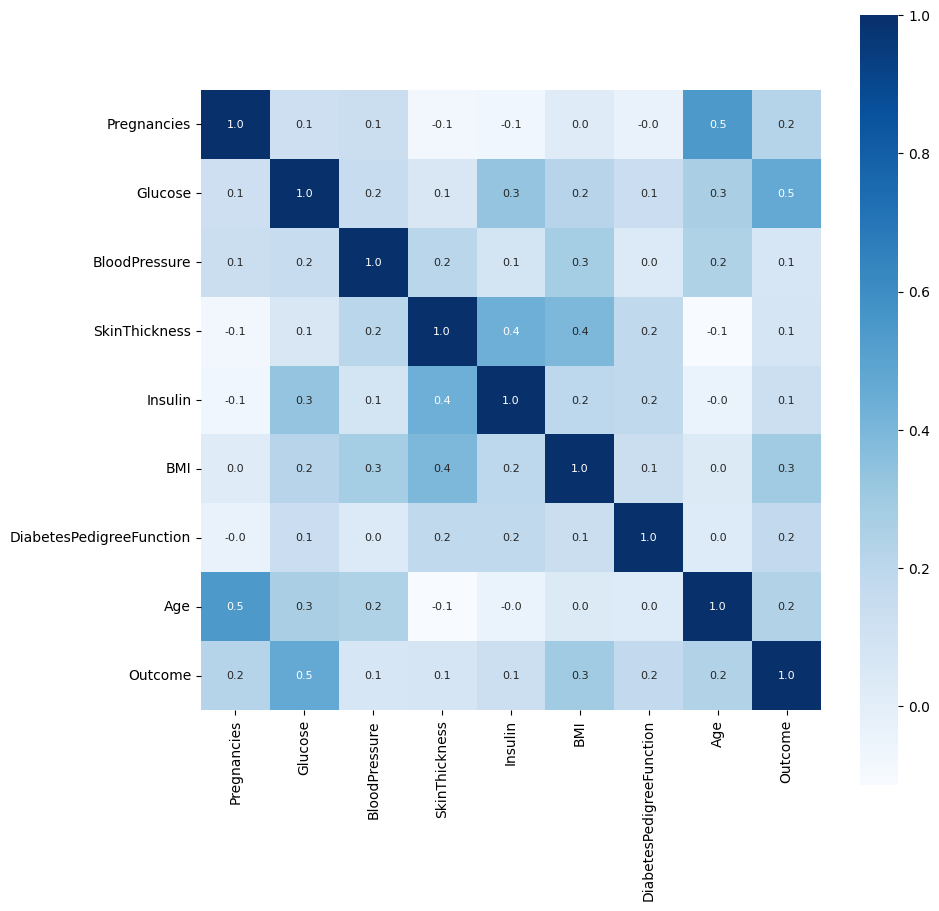

In [12]:
# Calculate correlation matrix
correlation_map = df.corr()
# constructing a heatmap to nderstand the correlation
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, 
            annot_kws={'size':8}, cmap='Blues')

In [13]:
df1 = df.astype(float)
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [15]:
print('df duplicated values: ',df1.duplicated().sum())
print('df missing values:\n',df1.isnull().sum())

df duplicated values:  0
df missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [16]:
zero_counts = df1.eq(0).sum()
print(zero_counts)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [18]:
# replacing null values with median
df1['Glucose'] = df1['Glucose'].replace(0, np.median(df1['Glucose']))
df1['BloodPressure'] = df1['BloodPressure'].replace(0, np.median(df1['BloodPressure']))
df1['SkinThickness'] = df1['SkinThickness'].replace(0, np.median(df1['SkinThickness']))
df1['Insulin'] = df1['Insulin'].replace(0, np.median(df1['Insulin']))
df1['BMI'] = df1['BMI'].replace(0, np.median(df1['BMI']))

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [20]:
X = df1.drop('Outcome', axis=1) 
y = df1['Outcome']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_pred = model.predict(X_test)
print('Model Accuracy: ', '%', accuracy_score(y_test, y_pred) * 100)

Model Accuracy:  % 81.81818181818183
